In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Load stock data
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'
dataset = yf.download(symbol, start=start, end=end)

import numpy as np

# Assuming 'dataset' is your DataFrame

# Create features and survival labels
dataset['Returns'] = dataset['Close'].pct_change()

# Define Buy_Sell: 1 if next day's Close price is higher, else 0
dataset['Buy_Sell'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

# Drop any NaN rows generated by pct_change or shift
dataset.dropna(inplace=True)

# Add survival time (duration) and event (1 = buy, 0 = sell)
dataset['duration'] = np.arange(1, len(dataset) + 1)
dataset['event'] = dataset['Buy_Sell']

# Select features and labels
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = dataset[features].values
y = dataset[['duration', 'event']].values

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
dataset.head()

Price,Close,High,Low,Open,Volume,Returns,Buy_Sell,duration,event
Ticker,AMD,AMD,AMD,AMD,AMD,,,,
Date,,,,,,,,,
2014-01-03,4.00,4.00,3.88,3.98,22887200,0.012658,1,1,1
2014-01-06,4.13,4.18,3.99,4.01,42398300,0.032500,1,2,1
2014-01-07,4.18,4.25,4.11,4.19,42932100,0.012106,0,3,0
2014-01-08,4.18,4.26,4.14,4.23,30678700,0.000000,0,4,0
2014-01-09,4.09,4.23,4.05,4.20,30667600,-0.021531,1,5,1


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import torch
from torch import nn
from pycox.models import CoxPH
# Change the import statement for MLPVanilla
from torchtuples import optim
from torchtuples.practical import MLPVanilla

# Define neural network
in_features = X_train.shape[1]
net = MLPVanilla(in_features, [32, 32], 1, batch_norm=True, dropout=0.1)

# Wrap in CoxPH model
model = CoxPH(net, optim.Adam)

ModuleNotFoundError: No module named 'pycox'

In [ ]:
import torch
from torch import nn
from pycox.models import CoxPH
from torchtuples import MLPVanilla, optim

# Define neural network
in_features = X_train.shape[1]
net = MLPVanilla(in_features, [32, 32], 1, batch_norm=True, dropout=0.1)

# Wrap in CoxPH model
model = CoxPH(net, optim.Adam)

ImportError: cannot import name 'MLPVanilla' from 'torchtuples' (/usr/local/lib/python3.11/dist-packages/torchtuples/__init__.py)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
# Assuming y_train shape is (N, 2), where [:, 0] = durations and [:, 1] = events
durations = torch.tensor(y_train[:, 0], dtype=torch.float32)
events = torch.tensor(y_train[:, 1], dtype=torch.float32)

# Fit the model by passing (durations, events) tuple instead of a single tensor
model.fit(X_train, (durations, events), batch_size=64, epochs=100, verbose=True)

<ipython-input-13-cfc135c24cf4>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-13-cfc135c24cf4>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  durations = torch.tensor(y_train[:, 0], dtype=torch.float32)
<ipython-input-13-cfc135c24cf4>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  events = torch.tensor(y_train[:, 1], dtype=torch.float32)


0:	[0s / 0s],		train_loss: 3.2427
1:	[0s / 0s],		train_loss: 2.8077
2:	[0s / 1s],		train_loss: 2.6300
3:	[0s / 1s],		train_loss: 2.5577
4:	[0s / 1s],		train_loss: 2.4638
5:	[0s / 1s],		train_loss: 2.4569
6:	[0s / 1s],		train_loss: 2.4195
7:	[0s / 1s],		train_loss: 2.3836
8:	[0s / 1s],		train_loss: 2.4425
9:	[0s / 2s],		train_loss: 2.3927
10:	[0s / 2s],		train_loss: 2.3614
11:	[0s / 2s],		train_loss: 2.3233
12:	[0s / 2s],		train_loss: 2.3408
13:	[0s / 2s],		train_loss: 2.3811
14:	[0s / 2s],		train_loss: 2.3284
15:	[0s / 2s],		train_loss: 2.3399
16:	[0s / 2s],		train_loss: 2.3127
17:	[0s / 2s],		train_loss: 2.3597
18:	[0s / 3s],		train_loss: 2.3427
19:	[0s / 3s],		train_loss: 2.3341
20:	[0s / 3s],		train_loss: 2.2861
21:	[0s / 3s],		train_loss: 2.3152
22:	[0s / 3s],		train_loss: 2.2811
23:	[0s / 3s],		train_loss: 2.3065
24:	[0s / 3s],		train_loss: 2.2632
25:	[0s / 3s],		train_loss: 2.2746
26:	[0s / 3s],		train_loss: 2.2620
27:	[0s / 3s],		train_loss: 2.2461
28:	[0s / 3s],		train_loss: 2.

<ipython-input-21-6feedfe85d92>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


Concordance Index (C-index): 0.8594


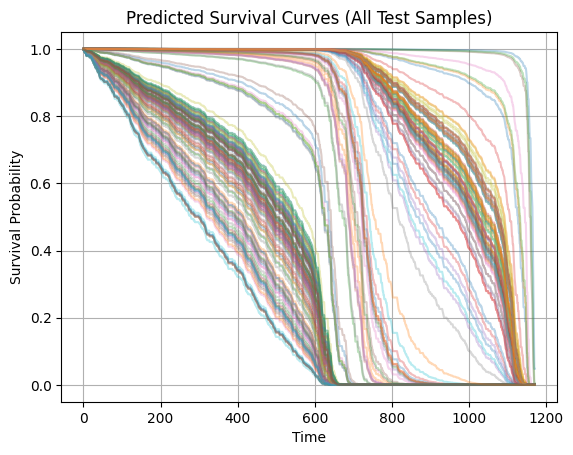

In [ ]:
from pycox.evaluation import EvalSurv
import matplotlib.pyplot as plt
import torch

# Ensure X_test is a torch tensor
X_test = torch.tensor(X_test, dtype=torch.float32)

# Split y_test into durations and events
durations_test = np.array(y_test[:, 0])
events_test = np.array(y_test[:, 1])

# Compute baseline hazards before prediction
_ = model.compute_baseline_hazards()

# Predict survival curves for all test samples
surv_df = model.predict_surv_df(X_test)

# Evaluate using EvalSurv
eval_surv = EvalSurv(surv_df, durations_test, events_test, censor_surv='km')

# Concordance index
c_index = eval_surv.concordance_td()
print(f"Concordance Index (C-index): {c_index:.4f}")

# Plot survival curves for all samples
surv_df.plot(legend=False, alpha=0.3)
plt.title("Predicted Survival Curves (All Test Samples)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()
